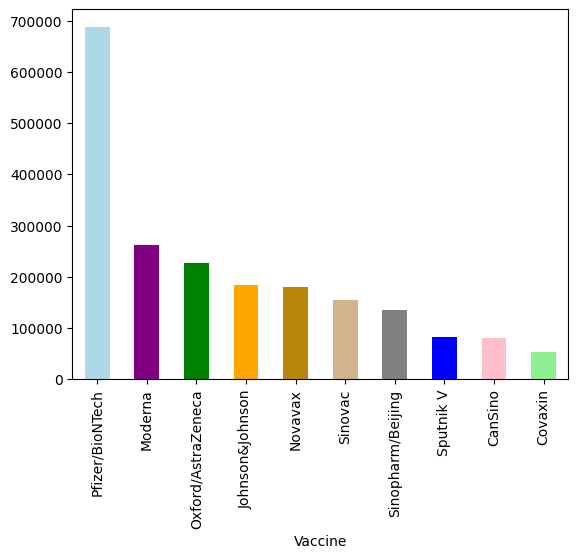

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk("/country_vaccinations.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from folium.features import Choropleth
import folium
from folium.features import Tooltip
import seaborn as sns
df = pd.read_csv("/country_vaccinations_by_manufacturer.csv")
df.head(10)
df["location"].nunique()
df.isnull().sum()
df.dtypes
df['date'] = pd.to_datetime(df['date'])
data=pd.DataFrame(columns=['Country', 'Vaccine', 'Total_vaccine'])
for country in df["location"].unique():
    for vaccine in df["vaccine"].unique():
        filtered_data = df[(df['location'] == country) & (df['vaccine'] == vaccine)]
        total_count = filtered_data['total_vaccinations'].max()
        data = pd.concat([data, pd.DataFrame({'Country': [country], 'Vaccine':
[vaccine], 'Total_vaccine': [total_count]})], ignore_index=True)
        data.head(10)
        data.dropna(axis=0,inplace=True)
        data.head(20)
        data_2=pd.DataFrame(columns=['Country', 'Vaccine'])
data["Total_vaccine"] = pd.to_numeric(data["Total_vaccine"], errors="coerce")
for country in data["Country"].unique():
    new_data = data[data["Country"] == country]
    max_vaccine = new_data.loc[new_data["Total_vaccine"].idxmax(), "Vaccine"]
    data_2 = pd.concat([data_2, pd.DataFrame({'Country': [country], 'Vaccine': [max_vaccine]})], ignore_index=True)
    data_2.head()
    data_2["Vaccine"].value_counts().plot(kind="bar",
                                    color=["Red","Gray","Gray","Gray"])
    number_of_days = (df["date"].max() -df["date"].min() ).days
    dtfrm=data[data["Vaccine"]=="Pfizer/BioNTech"]
dtfrm = dtfrm.drop(dtfrm[dtfrm['Country'] == 'European Union'].index)
dtfrm.head(10)
dtfrm["average_vaccination_count"] = dtfrm["Total_vaccine"] / number_of_days
dtfrm["average_vaccination_count"] =dtfrm["average_vaccination_count"].astype(int)
dtfrm.head(15)
dtfrm.set_index("Country",inplace=True)
color=["Lightblue","Purple","Green","Orange","darkgoldenrod","tan","Gray","Blue","Pink","Lightgreen"]
dtfrm["average_vaccination_count"].sort_values(ascending=False).head(10).plot(kind="bar",color=color)
number_of_vaccines = data.groupby('Vaccine')['Country'].nunique()
number_of_vaccines.sort_values(ascending=False).plot(kind="bar",color="r")
fig = px.choropleth(data_frame=dtfrm,
                    locations=dtfrm.index,
                    locationmode='country names',
                    color='Total_vaccine',
                    color_continuous_scale='YlOrRd',
                    title='Ülkelerde Yapılan Biontech Aşıları')


fig.update_layout(title_x=0.5)
m = folium.Map(location=[0, 0], zoom_start=2)
Choropleth(
    geo_data='https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json',
    name='choropleth',
    data=dtfrm,
    columns=[dtfrm.index, 'Total_vaccine'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Aşı Sayısı',
).add_to(m)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')